<a href="https://colab.research.google.com/github/u1-byte/SmartRicePriceControl/blob/main/Machine%20Learning/Code/ML_Building_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL UNTUK MEMPREDIKSI TOTAL PRODUKSI BERAS PADA WILAYAH TERTENTU

1.   Input : Suhu, kelembaban, curah hujan, lama penyinaran, luas lahan
2.   Output : Total produksi beras
3.   Scope Input dan Output :  Data diambail rata rata dalam tiap bulan pada 3 kabupaten (Lamongan, Banyuwangi, Tuban) di Jawa Timur 
4.   Sumber : https://dataonline.bmkg.go.id/data_iklim,  https://jatim.bps.go.id/publication/2020/12/28/53ad74b4263660ce4adf0ed3/analisis-data-beras-provinsi-jawa-timur-2018-2020.html

In [1]:
# Import library yang dibutuhkan
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files
import csv
from sklearn.preprocessing import MinMaxScaler

In [35]:
# Upload file dataset dari lokal
uploaded = files.upload()

Saving Database.csv to Database.csv


# **Exploratory Data Analysis**

In [3]:
# Input data Kabupaten Lamongan
input_suhu_max_lamongan = []
input_suhu_min_lamongan = []
input_suhu_ratarata_lamongan = []
input_kelembaban_max_lamongan = []
input_kelembaban_min_lamongan = []
input_kelembaban_ratarata_lamongan = []
input_curah_hujan_lamongan = []
input_lama_penyinaran_lamongan = []
input_luas_lahan_lamongan = []
number_of_input = []
number=1

# Baca file.csv
with open('/content/Database - Lamongan.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_input.append(number)
    input_suhu_max_lamongan.append(float(row[5]))
    input_suhu_min_lamongan.append(float(row[6]))
    input_suhu_ratarata_lamongan.append(float(row[7]))
    input_kelembaban_max_lamongan.append(float(row[8]))
    input_kelembaban_min_lamongan.append(float(row[9]))
    input_kelembaban_ratarata_lamongan.append(float(row[10]))
    input_curah_hujan_lamongan.append(float(row[11]))
    input_lama_penyinaran_lamongan.append(float(row[12]))
    input_luas_lahan_lamongan.append(float(row[13]))
    number+=1

In [4]:
# Input data Kabupaten Banyuwangi
input_suhu_max_banyuwangi = []
input_suhu_min_banyuwangi = []
input_suhu_ratarata_banyuwangi = []
input_kelembaban_max_banyuwangi = []
input_kelembaban_min_banyuwangi = []
input_kelembaban_ratarata_banyuwangi = []
input_curah_hujan_banyuwangi = []
input_lama_penyinaran_banyuwangi = []
input_luas_lahan_banyuwangi = []
number_of_input = []
number=1

# Baca file.csv
with open('/content/Database - Banyuwangi.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_input.append(number)
    input_suhu_max_banyuwangi.append(float(row[5]))
    input_suhu_min_banyuwangi.append(float(row[6]))
    input_suhu_ratarata_banyuwangi.append(float(row[7]))
    input_kelembaban_max_banyuwangi.append(float(row[8]))
    input_kelembaban_min_banyuwangi.append(float(row[9]))
    input_kelembaban_ratarata_banyuwangi.append(float(row[10]))
    input_curah_hujan_banyuwangi.append(float(row[11]))
    input_lama_penyinaran_banyuwangi.append(float(row[12]))
    input_luas_lahan_banyuwangi.append(float(row[13]))
    number+=1

In [5]:
# Input data Kabupaten Tuban
input_suhu_max_tuban = []
input_suhu_min_tuban = []
input_suhu_ratarata_tuban = []
input_kelembaban_max_tuban = []
input_kelembaban_min_tuban = []
input_kelembaban_ratarata_tuban = []
input_curah_hujan_tuban = []
input_lama_penyinaran_tuban = []
input_luas_lahan_tuban = []
number_of_input = []
number=1

# Baca file.csv
with open('/content/Database - Tuban.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_input.append(number)
    input_suhu_max_tuban.append(float(row[5]))
    input_suhu_min_tuban.append(float(row[6]))
    input_suhu_ratarata_tuban.append(float(row[7]))
    input_kelembaban_max_tuban.append(float(row[8]))
    input_kelembaban_min_tuban.append(float(row[9]))
    input_kelembaban_ratarata_tuban.append(float(row[10]))
    input_curah_hujan_tuban.append(float(row[11]))
    input_lama_penyinaran_tuban.append(float(row[12]))
    input_luas_lahan_tuban.append(float(row[13]))
    number+=1

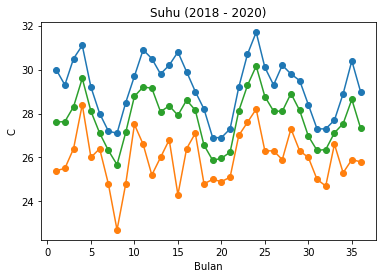

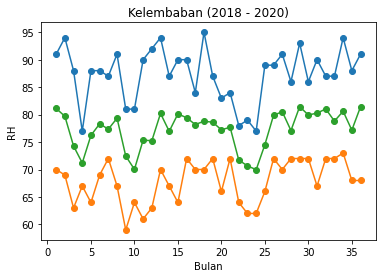

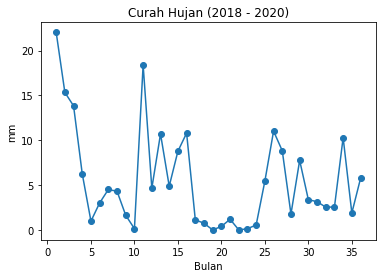

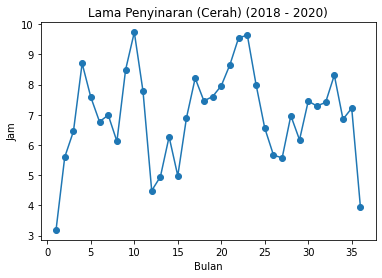

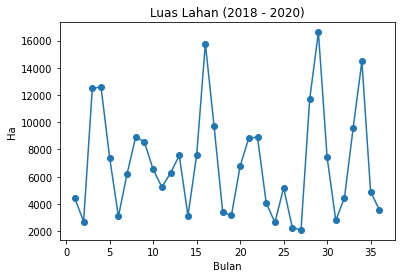

In [6]:
# Grafik data Kabupaten Banyuwangi

# Grafik garis dari Suhu
plt.plot(number_of_input,input_suhu_max_banyuwangi,marker='o')
plt.plot(number_of_input,input_suhu_min_banyuwangi,marker='o')
plt.plot(number_of_input,input_suhu_ratarata_banyuwangi,marker='o')
plt.title('Suhu (2018 - 2020)')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Kelembaban
plt.plot(number_of_input,input_kelembaban_max_banyuwangi,marker='o')
plt.plot(number_of_input,input_kelembaban_min_banyuwangi,marker='o')
plt.plot(number_of_input,input_kelembaban_ratarata_banyuwangi,marker='o')
plt.title('Kelembaban (2018 - 2020)')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Curah Hujan
plt.plot(number_of_input,input_curah_hujan_banyuwangi,marker='o')
plt.title('Curah Hujan (2018 - 2020)')
plt.ylabel('mm')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Lama Penyinaran
plt.plot(number_of_input,input_lama_penyinaran_banyuwangi,marker='o')
plt.title('Lama Penyinaran (Cerah) (2018 - 2020)')
plt.ylabel('Jam')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Luas Lahan
plt.plot(number_of_input,input_luas_lahan_banyuwangi,marker='o')
plt.title('Luas Lahan (2018 - 2020)')
plt.ylabel('Ha')
plt.xlabel('Bulan')
plt.show()

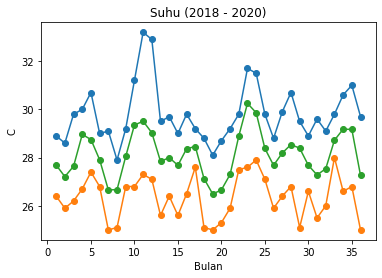

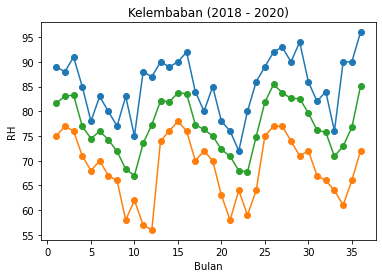

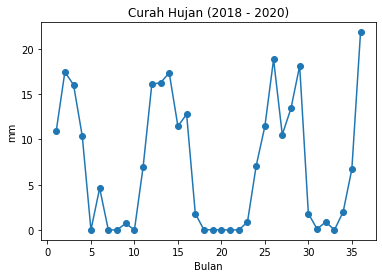

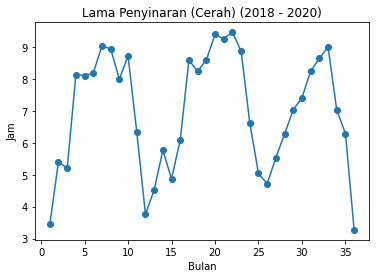

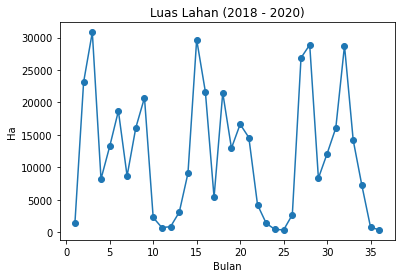

In [7]:
# Grafik data Kabupaten Lamongan

# Grafik garis dari Suhu
plt.plot(number_of_input,input_suhu_max_lamongan,marker='o')
plt.plot(number_of_input,input_suhu_min_lamongan,marker='o')
plt.plot(number_of_input,input_suhu_ratarata_lamongan,marker='o')
plt.title('Suhu (2018 - 2020)')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Kelembaban
plt.plot(number_of_input,input_kelembaban_max_lamongan,marker='o')
plt.plot(number_of_input,input_kelembaban_min_lamongan,marker='o')
plt.plot(number_of_input,input_kelembaban_ratarata_lamongan,marker='o')
plt.title('Kelembaban (2018 - 2020)')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Curah Hujan
plt.plot(number_of_input,input_curah_hujan_lamongan,marker='o')
plt.title('Curah Hujan (2018 - 2020)')
plt.ylabel('mm')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Lama Penyinaran
plt.plot(number_of_input,input_lama_penyinaran_lamongan,marker='o')
plt.title('Lama Penyinaran (Cerah) (2018 - 2020)')
plt.ylabel('Jam')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Luas Lahan
plt.plot(number_of_input,input_luas_lahan_lamongan,marker='o')
plt.title('Luas Lahan (2018 - 2020)')
plt.ylabel('Ha')
plt.xlabel('Bulan')
plt.show()

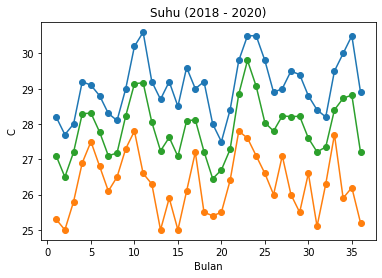

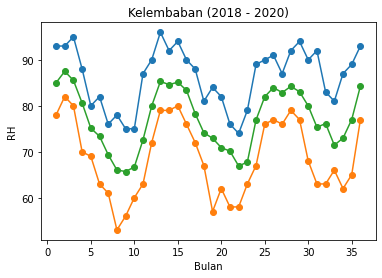

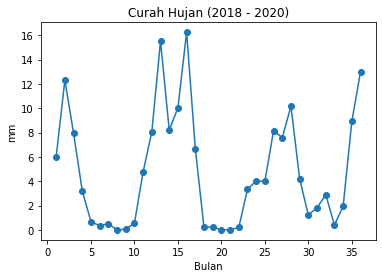

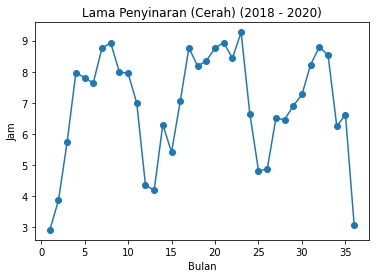

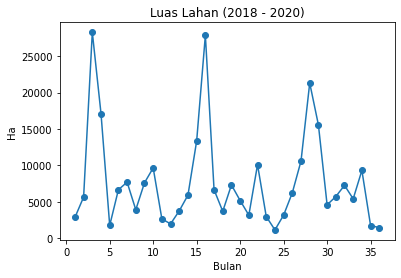

In [8]:
# Grafik data Kabupaten Tuban

# Grafik garis dari Suhu
plt.plot(number_of_input,input_suhu_max_tuban,marker='o')
plt.plot(number_of_input,input_suhu_min_tuban,marker='o')
plt.plot(number_of_input,input_suhu_ratarata_tuban,marker='o')
plt.title('Suhu (2018 - 2020)')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Kelembaban
plt.plot(number_of_input,input_kelembaban_max_tuban,marker='o')
plt.plot(number_of_input,input_kelembaban_min_tuban,marker='o')
plt.plot(number_of_input,input_kelembaban_ratarata_tuban,marker='o')
plt.title('Kelembaban (2018 - 2020)')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Curah Hujan
plt.plot(number_of_input,input_curah_hujan_tuban,marker='o')
plt.title('Curah Hujan (2018 - 2020)')
plt.ylabel('mm')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Lama Penyinaran
plt.plot(number_of_input,input_lama_penyinaran_tuban,marker='o')
plt.title('Lama Penyinaran (Cerah) (2018 - 2020)')
plt.ylabel('Jam')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Luas Lahan
plt.plot(number_of_input,input_luas_lahan_tuban,marker='o')
plt.title('Luas Lahan (2018 - 2020)')
plt.ylabel('Ha')
plt.xlabel('Bulan')
plt.show()

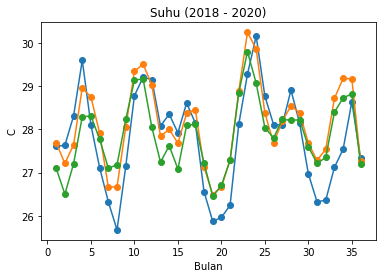

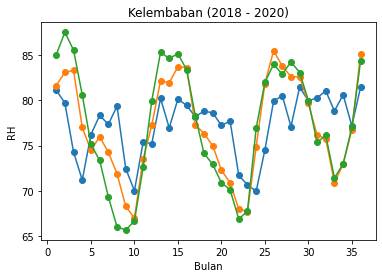

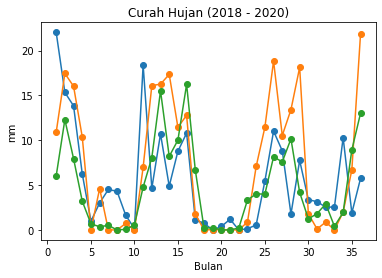

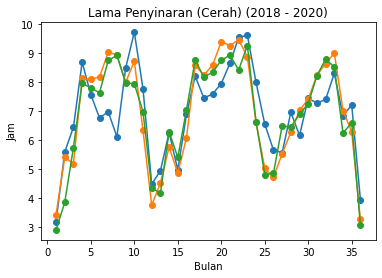

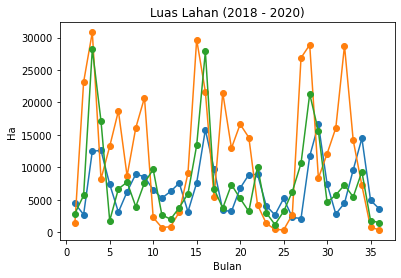

In [9]:
# Grafik perbandingan data 3 Kabupaten

# Grafik garis dari Suhu
plt.plot(number_of_input,input_suhu_ratarata_banyuwangi,marker='o')
plt.plot(number_of_input,input_suhu_ratarata_lamongan,marker='o')
plt.plot(number_of_input,input_suhu_ratarata_tuban,marker='o')
plt.title('Suhu (2018 - 2020)')
plt.ylabel('C')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Kelembaban
plt.plot(number_of_input,input_kelembaban_ratarata_banyuwangi,marker='o')
plt.plot(number_of_input,input_kelembaban_ratarata_lamongan,marker='o')
plt.plot(number_of_input,input_kelembaban_ratarata_tuban,marker='o')
plt.title('Kelembaban (2018 - 2020)')
plt.ylabel('RH')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Curah Hujan
plt.plot(number_of_input,input_curah_hujan_banyuwangi,marker='o')
plt.plot(number_of_input,input_curah_hujan_lamongan,marker='o')
plt.plot(number_of_input,input_curah_hujan_tuban,marker='o')
plt.title('Curah Hujan (2018 - 2020)')
plt.ylabel('mm')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Lama Penyinaran
plt.plot(number_of_input,input_lama_penyinaran_banyuwangi,marker='o')
plt.plot(number_of_input,input_lama_penyinaran_lamongan,marker='o')
plt.plot(number_of_input,input_lama_penyinaran_tuban,marker='o')
plt.title('Lama Penyinaran (Cerah) (2018 - 2020)')
plt.ylabel('Jam')
plt.xlabel('Bulan')
plt.show()

# Grafik garis dari Luas Lahan
plt.plot(number_of_input,input_luas_lahan_banyuwangi,marker='o')
plt.plot(number_of_input,input_luas_lahan_lamongan,marker='o')
plt.plot(number_of_input,input_luas_lahan_tuban,marker='o')
plt.title('Luas Lahan (2018 - 2020)')
plt.ylabel('Ha')
plt.xlabel('Bulan')
plt.show()

In [10]:
# Output data Kabupaten Lamongan
output_total_produksi_beras_lamongan = []
number_of_output = []
number=1

# Baca file.csv
with open('/content/Database - Lamongan.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_output.append(number)
    output_total_produksi_beras_lamongan.append(float(row[14]))
    number+=1

In [11]:
# Output data Kabupaten Banyuwangi
output_total_produksi_beras_banyuwangi = []
number_of_output = []
number=1

# Baca file.csv
with open('/content/Database - Banyuwangi.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_output.append(number)
    output_total_produksi_beras_banyuwangi.append(float(row[14]))
    number+=1

In [12]:
# Output data Kabupaten Tuban
output_total_produksi_beras_tuban = []
number_of_output = []
number=1

# Baca file.csv
with open('/content/Database - Tuban.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    number_of_output.append(number)
    output_total_produksi_beras_tuban.append(float(row[14]))
    number+=1

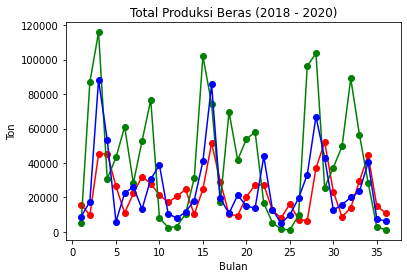

In [26]:
# Grafik perbandingan data 3 Kabupaten

# Grafik garis dari total produksi beras
plt.plot(number_of_output,output_total_produksi_beras_banyuwangi,marker='o',color='red')
plt.plot(number_of_output,output_total_produksi_beras_lamongan,marker='o',color='green')
plt.plot(number_of_output,output_total_produksi_beras_tuban,marker='o',color='blue')
plt.title('Total Produksi Beras (2018 - 2020)')
plt.ylabel('Ton')
plt.xlabel('Bulan')
plt.show()

# **Data Prepocessing**

In [36]:
# Input dari data pada database
input = []
counter=0

# Baca file.csv
with open('/content/Database.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    input.append([])
    input[counter].append(float(row[0]))
    input[counter].append(float(row[1]))
    input[counter].append(float(row[2]))
    input[counter].append(float(row[5]))
    input[counter].append(float(row[6]))
    input[counter].append(float(row[7]))
    input[counter].append(float(row[8]))
    input[counter].append(float(row[9]))
    input[counter].append(float(row[10]))
    input[counter].append(float(row[11]))
    input[counter].append(float(row[12]))
    input[counter].append(float(row[13]))
    counter+=1

input = np.array(input)

print(input)

[[1.0000e+00 0.0000e+00 0.0000e+00 ... 1.0880e+01 3.4400e+00 1.3850e+03]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 1.7450e+01 5.4100e+00 2.3129e+04]
 [1.0000e+00 0.0000e+00 0.0000e+00 ... 1.6030e+01 5.2000e+00 3.0824e+04]
 ...
 [0.0000e+00 0.0000e+00 1.0000e+00 ... 1.9500e+00 6.2500e+00 9.3130e+03]
 [0.0000e+00 0.0000e+00 1.0000e+00 ... 8.9200e+00 6.6100e+00 1.7520e+03]
 [0.0000e+00 0.0000e+00 1.0000e+00 ... 1.3010e+01 3.0700e+00 1.4660e+03]]


In [37]:
# Output dari data pada database
output = []
counter=0

# Baca file.csv
with open('/content/Database.csv') as csv_file:
  csv_reader = csv.reader(csv_file, delimiter=',')
  next(csv_reader)
  for row in csv_reader:
    output.append([])
    output[counter].append(float(row[14]))
    counter+=1

output = np.array(output)

print(output)

[[  5209.48]
 [ 86975.4 ]
 [115862.16]
 [ 30774.59]
 [ 43242.82]
 [ 61068.1 ]
 [ 28292.76]
 [ 52681.05]
 [ 76667.7 ]
 [  8336.23]
 [  2551.31]
 [  3091.78]
 [ 15928.9 ]
 [  9757.82]
 [ 45069.81]
 [ 45451.84]
 [ 26473.66]
 [ 11069.01]
 [ 22321.44]
 [ 32151.33]
 [ 28035.94]
 [ 21473.32]
 [ 17215.7 ]
 [ 20620.07]
 [  8919.26]
 [ 17647.85]
 [ 88166.98]
 [ 53368.58]
 [  5963.89]
 [ 22567.4 ]
 [ 26090.58]
 [ 13280.79]
 [ 30596.29]
 [ 38858.77]
 [ 10700.88]
 [  7964.59]
 [ 10558.09]
 [ 31180.56]
 [101956.71]
 [ 74319.36]
 [ 17322.18]
 [ 69561.05]
 [ 41828.82]
 [ 53880.42]
 [ 58044.09]
 [ 16713.73]
 [  5373.29]
 [  1637.76]
 [ 24683.18]
 [ 10217.73]
 [ 24777.63]
 [ 51528.42]
 [ 29243.91]
 [ 10147.88]
 [  9540.8 ]
 [ 20361.59]
 [ 27265.68]
 [ 27366.8 ]
 [ 12511.74]
 [  8128.77]
 [ 11590.42]
 [ 18216.62]
 [ 41044.27]
 [ 85570.82]
 [ 19437.87]
 [ 10804.02]
 [ 21359.23]
 [ 15103.27]
 [ 13768.52]
 [ 43813.82]
 [ 12969.53]
 [  4995.64]
 [  1194.46]
 [  9610.85]
 [ 96343.8 ]
 [103583.39]
 [ 25728.34]

In [38]:
# Bagi data untuk training, validasi dan testing
split_scaled = 72

input_scaled = input[:split_scaled]
input_test = input[split_scaled:]
output_scaled = output[:split_scaled]
output_test = output[split_scaled:]

print(len(input_scaled))
print(len(input_test))

72
36


In [39]:
# Normalisasi data
split_valid = 36

scaler_input = MinMaxScaler()
scaler_input.fit(input_scaled)
input_train_scaled = scaler_input.transform(input_scaled[:split_valid])
input_valid_scaled = scaler_input.transform(input_scaled[split_valid:])

print(input_train_scaled)
print(input_valid_scaled)

scaler_output = MinMaxScaler()
scaler_output.fit(output_scaled)
output_train_scaled = scaler_output.transform(output_scaled[:split_valid])
output_valid_scaled = scaler_output.transform(output_scaled[split_valid:])

print(output_train_scaled)
print(output_valid_scaled)

[[1.         0.         0.         0.31746032 0.64912281 0.44104803
  0.70833333 0.75862069 0.72981651 0.49342404 0.07771261 0.03202578]
 [1.         0.         0.         0.26984127 0.56140351 0.33624454
  0.66666667 0.82758621 0.79678899 0.79138322 0.36656891 0.7469832 ]
 [1.         0.         0.         0.46031746 0.61403509 0.430131
  0.79166667 0.79310345 0.80688073 0.72698413 0.33577713 1.        ]
 [1.         0.         0.         0.49206349 0.70175439 0.71834061
  0.54166667 0.62068966 0.51834862 0.47029478 0.76686217 0.25558149]
 [1.         0.         0.         0.6031746  0.8245614  0.67248908
  0.25       0.51724138 0.40275229 0.         0.76246334 0.42093841]
 [1.         0.         0.         0.33333333 0.71929825 0.48908297
  0.45833333 0.5862069  0.47110092 0.20907029 0.77419355 0.60086147]
 [1.         0.         0.         0.34920635 0.40350877 0.21615721
  0.33333333 0.48275862 0.39266055 0.         0.89882698 0.27096965]
 [1.         0.         0.         0.158730

In [48]:
# Callbacks
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('mae')<0.01):
      print("The MAE score has reached 100")
      self.model.stop_training = True

callbacks = myCallback()

In [49]:
# Model machine learning
model = tf.keras.Sequential([
          tf.keras.layers.Dense(units = 128, activation="relu", input_dim=12),
          tf.keras.layers.Dense(units = 64, activation="relu"),
          tf.keras.layers.Dense(units = 1, activation="linear")
        ])

model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=['mae'])

model.summary()

fitting_history = model.fit(input_train_scaled, output_train_scaled, epochs = 500, validation_data=(input_valid_scaled,output_valid_scaled), callbacks=[callbacks])

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 128)               1664      
_________________________________________________________________
dense_10 (Dense)             (None, 64)                8256      
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 65        
Total params: 9,985
Trainable params: 9,985
Non-trainable params: 0
_________________________________________________________________
Epoch 1/500
2/2 [==============================] - 1s 169ms/step - loss: 0.1338 - mae: 0.2798 - val_loss: 0.0530 - val_mae: 0.1653
Epoch 2/500
2/2 [==============================] - 0s 29ms/step - loss: 0.0620 - mae: 0.1801 - val_loss: 0.0499 - val_mae: 0.1873
Epoch 3/500
2/2 [==============================] - 0s 31ms/step - loss: 0.0525 - mae: 0.1903 - val_loss: 0.0602 - val_mae

<Figure size 432x288 with 0 Axes>

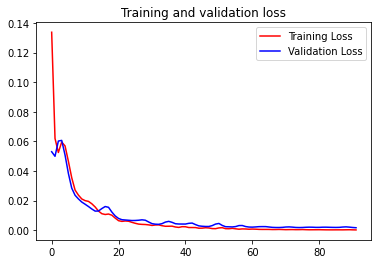

<Figure size 432x288 with 0 Axes>

In [50]:
# Grafik training dan validation loss
training_loss=fitting_history.history['loss']
validation_loss=fitting_history.history['val_loss']
epochs=range(len(training_loss))

plt.plot(epochs, training_loss, 'r', label="Training Loss")
plt.plot(epochs, validation_loss, 'b', label="Validation Loss")
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

<Figure size 432x288 with 0 Axes>

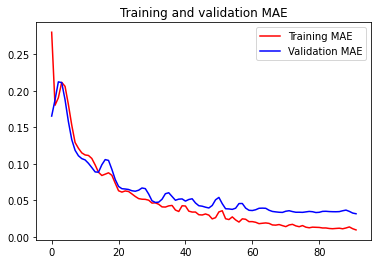

<Figure size 432x288 with 0 Axes>

In [51]:
# Grafik training and validation MAE
training_mae=fitting_history.history['mae']
validation_mae=fitting_history.history['val_mae']
epochs=range(len(training_mae))

plt.plot(epochs, training_mae, 'r', label="Training MAE")
plt.plot(epochs, validation_mae, 'b', label="Validation MAE")
plt.title('Training and validation MAE')
plt.legend(loc=0)
plt.figure()

In [57]:
# Input dari data validasi
validation_data=[]
number_of_validation=[]
counter=0
number=1

for x in input_valid_scaled:
  validation_data.append([])
  for y in x:
    validation_data[counter].append(y)
  counter+=1
  number_of_validation.append(number)
  number+=1

total_of_validation=len(input_valid_scaled)
print(total_of_validation)
print(number_of_validation)

36
[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36]


In [96]:
# Output dari data validasi
output_valid_transform=[]
counter=0

for i in output_valid_scaled:
  output_valid_transform.append([])
  for x in i:
    output_valid_transform[counter].append([])
    output_valid_transform[counter][0].append(i[0])
  counter+=1

print(output_valid_transform)

[[[0.07809478535234153]], [[0.2586382594261821]], [[0.8782620000630339]], [[0.6363053778352086]], [[0.13731234307205817]], [[0.5946478160533126]], [[0.35186054818410073]], [[0.457368653282486]], [[0.4938203221028081]], [[0.13198554774636592]], [[0.03270343289174642]], [[0.0]], [[0.20175566691530006]], [[0.07511503671719878]], [[0.2025825480370219]], [[0.4367776061857186]], [[0.24168347568470486]], [[0.07450352113909112]], [[0.06918871974814488]], [[0.16392145636133787]], [[0.22436467164633828]], [[0.22524994659634895]], [[0.09519839894103187]], [[0.05682682509166168]], [[0.08713252159783724]], [[0.1451428941627183]], [[0.3449920507352194]], [[0.7348084997601214]], [[0.1558345677455955]], [[0.08024782795970038]], [[0.17265549217155005]], [[0.11788645858503088]], [[0.10620112690458432]], [[0.3692386215204457]], [[0.09920621163254087]], [[0.02939722160939344]]]


In [101]:
# Prediksi data validasi
output_prediksi=[]
output_validation=[]

for i in range(total_of_validation):
  input_prediksi=[]
  input_prediksi.append([])
  for y in validation_data[i]:
    input_prediksi[0].append(y)
  prediksi = model.predict(input_prediksi)
  prediksi = scaler_output.inverse_transform(prediksi)
  output_prediksi.append(prediksi[0][0])
  valid = scaler_output.inverse_transform(output_valid_transform[i])
  output_validation.append(valid[0][0])

print(output_prediksi)
print(output_validation)

[16669.613, 40325.758, 101221.26, 80379.08, 21863.12, 65740.22, 46486.215, 53277.836, 46185.8, 18960.281, 5493.155, 2595.17, 22505.092, 11194.5205, 17281.752, 47852.027, 27657.455, 11743.955, 12972.896, 20932.404, 26508.662, 26940.922, 15486.412, 18466.229, 17024.023, 16733.271, 38760.785, 89589.55, 27204.18, 6324.06, 17907.467, 14671.807, 8553.318, 38347.918, 14821.026, 2781.774]
[10558.09, 31180.56, 101956.71, 74319.36, 17322.18, 69561.05, 41828.82, 53880.42, 58044.09, 16713.73, 5373.29, 1637.76, 24683.18, 10217.73, 24777.63, 51528.42, 29243.91, 10147.88, 9540.8, 20361.59, 27265.68, 27366.8, 12511.74, 8128.770000000001, 11590.42, 18216.62, 41044.27, 85570.82, 19437.87, 10804.02, 21359.23, 15103.270000000002, 13768.52, 43813.82, 12969.53, 4995.64]


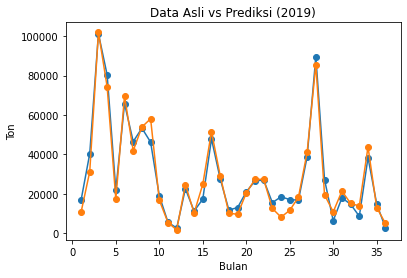

In [105]:
# Grafik garis dari total produksi beras
plt.plot(number_of_validation,output_prediksi,marker='o')
plt.plot(number_of_validation,output_validation,marker='o')
plt.title('Data Asli vs Prediksi (2019)')
plt.ylabel('Ton')
plt.xlabel('Bulan')
plt.show()

In [104]:
# Simpan model
model.save('model.h5')